# Linear Regression
### 공부 시간에 따른 시험 점수

In [ ]:
# import sklearn
# sklearn.__version__

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X = dataset.iloc[:, :-1].values   # row, col, 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수)
y = dataset.iloc[:, -1].values    # 마지작 컬럼 데이터 (종속변수 - 결과)

In [5]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()    # 객체 생성
reg.fit(X, y)           # 학습 (모델생성)

LinearRegression()

In [7]:
y_pred = reg.predict(X)   # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

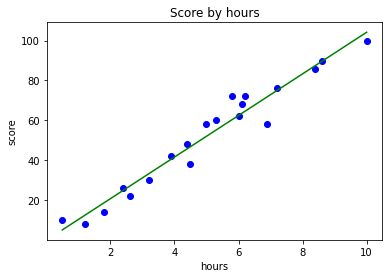

In [9]:
plt.scatter(X, y, color='blue') # 산점도 
plt.plot(X, y_pred, color='green')   # 선 그래프
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [11]:
print('9시간 공부했을 때 예상점수 : ', reg.predict([[9]]))   # [[9], [8], [7]]

9시간 공부했을 때 예상점수 :  [93.77478776]


In [10]:
reg.coef_  # 기울기 (m)

array([10.44369694])

In [11]:
reg.intercept_  # y 절편 (b)

-0.218484702867201

In [ ]:
# y = mx + b  -> y = 10.4436 x - 0.2184

### 데이터 세트 분리

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 훈련 80: 테스트 20으로 분리

In [5]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [6]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [7]:
X_test, len(X_test)  # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [8]:
y, len(y)  # 전체 데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [9]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [6]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [8]:
reg.fit(X_train, y_train)   # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련세트)

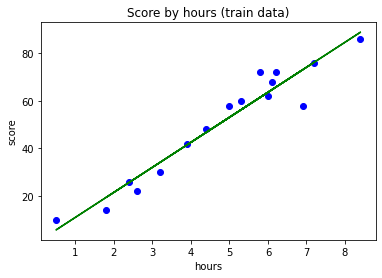

In [9]:
plt.scatter(X_train, y_train, color='blue') # 산점도 
plt.plot(X_train, reg.predict(X_train), color='green')   # 선 그래프
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 세트)

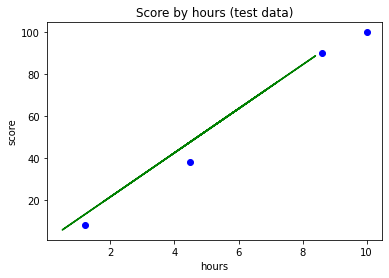

In [10]:
plt.scatter(X_test, y_test, color='blue') # 산점도 
plt.plot(X_train, reg.predict(X_train), color='green')   # 선 그래프
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [17]:
reg.coef_

array([10.49161294])

In [18]:
reg.intercept_

0.6115562905169369

### 모델 평가

In [19]:
reg.score(X_test, y_test)  # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [11]:
reg.score(X_train, y_train)

0.9356663661221668

### 경사하강법 (Gradient Descent)

In [13]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

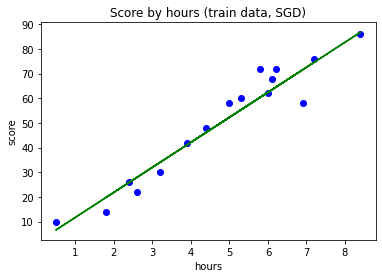

In [14]:
plt.scatter(X_train, y_train, color='blue') # 산점도 
plt.plot(X_train, sr.predict(X_train), color='green')   # 선 그래프
plt.title('Score by hours (train data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [15]:
sr.coef_, sr.intercept_

(array([10.14072843]), array([1.57996726]))

In [16]:
sr.score(X_test, y_test)  # 테스트 세트를 통한 모델 평가 

0.9774243005385271

In [18]:
sr.score(X_train, y_train)  # 훈련 세트를 통한 모델 평가

0.9337039730986324

### 계수 정의 후
max_iter : 훈련세트 반복 횟수 (epoch 회수)
eta0 : 학습률 (learning rate)
   지수 표기법
   1e-3 : 0.001 (10^-3)
   1e-4 : 0.0001 (10^-4)

In [28]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor(max_iter=400, eta0=1e-4, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

c:\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=400, random_state=0, verbose=1)

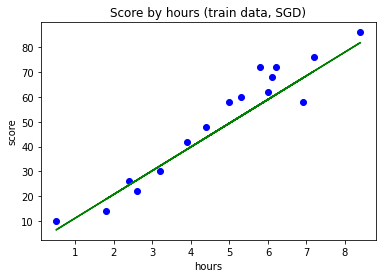

In [29]:
plt.scatter(X_train, y_train, color='blue') # 산점도 
plt.plot(X_train, sr.predict(X_train), color='green')   # 선 그래프
plt.title('Score by hours (train data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()